## Evaluate ability of GPT3 to estimate prices
### run magnitudes.ipynb first

In [1]:
import os
import openai
import pandas as pd
import sklearn
from sklearn.metrics import mean_absolute_error,f1_score,accuracy_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
openai.api_key = os.getenv("OPENAI_API_KEY")

def orderOfMagnitude(number):
    try:
        order=math.floor(math.log(number, 10))
    except:
        order=None
    return order

### Prepare requests

In [2]:
df=pd.read_csv("../input_data/costs_expanded.csv")
df=df.rename(columns={'Tasks':'query','Average Price(USD)':'in USD'})

df['query']=df['query'].str.lower().replace("average","",regex=True).str.lstrip(" ")

df=df.dropna().reset_index(drop=True)

In [79]:
df.shape

(215, 4)

### Ask for prices

In [6]:
for i,d in df.iterrows():
    prompt="What is the average price for "+d['query']+"? (Respond with a dollar amount.)"
    response = openai.Completion.create(engine="text-davinci-002", prompt=prompt,temperature=0,max_tokens=80)
    response_text=response.choices[0].text
    df.loc[i,'GPT3_estimation']=response_text
    print(prompt)
    print(response_text)
    print("Ground truth",d['in USD'])
    print("################################")

What is the average price for logo design? (Respond with a dollar amount.)


There is no definitive answer to this question as logo design prices can vary greatly depending on the designer, the scope of the project, the level of customization, etc. However, a quick search on Google shows that the average price for logo design seems to be around $250.
Ground truth 113.2338889
################################
What is the average price for brand style guides? (Respond with a dollar amount.)


$500
Ground truth 144.4327778
################################
What is the average price for game art? (Respond with a dollar amount.)


There is no definitive answer to this question as the price for game art can vary greatly depending on the project, the artist, and the scope of the work. However, a good rule of thumb is to budget $50-$100 per hour for game art.
Ground truth 63.99444444
################################
What is the average price for graphics for streamers? (Respond with a dollar amo

What is the average price for invitation design? (Respond with a dollar amount.)


The average price for invitation design is $100.
Ground truth 16.45611111
################################
What is the average price for portraits & caricatures? (Respond with a dollar amount.)


$100
Ground truth 27.00666667
################################
What is the average price for cartoons & comics? (Respond with a dollar amount.)


The average price for cartoons & comics is $3.50.
Ground truth 31.66027778
################################
What is the average price for tattoo design? (Respond with a dollar amount.)


There is no definitive answer to this question as tattoo prices vary greatly depending on the size, complexity, and location of the design, as well as the artist's individual rate. However, a rough estimate for a small, simple tattoo design would be around $50-$100, while a larger, more complex tattoo could cost several hundred dollars or more.
Ground truth 23.14972222
################

What is the average price for social media marketing? (Respond with a dollar amount.)


The average price for social media marketing is $2000.
Ground truth 51.40027778
################################
What is the average price for influencer marketing? (Respond with a dollar amount.)


The average price for influencer marketing is $2000.
Ground truth 29.84388889
################################
What is the average price for community management? (Respond with a dollar amount.)


The average price for community management is $50 per hour.
Ground truth 74.65888889
################################
What is the average price for social media advertising? (Respond with a dollar amount.)


The average price for social media advertising is $200.
Ground truth 75.67944444
################################
What is the average price for search engine marketing (sem)? (Respond with a dollar amount.)


The average price for search engine marketing (sem) is $10,000.
Ground truth 200.9316667
##########

What is the average price for technical writing? (Respond with a dollar amount.)


There is no definitive answer to this question as the price for technical writing services can vary greatly depending on the scope and complexity of the project, the writer's experience and expertise, and other factors. However, a quick search on freelancing websites like Upwork or Fiverr reveals that the average price for basic technical writing services is around $50-$100 per hour.
Ground truth 44.36583333
################################
What is the average price for brand voice & tone? (Respond with a dollar amount.)


There is no definitive answer to this question as the price for brand voice & tone can vary greatly depending on the scope and size of the project, the experience of the freelancer, and other factors. However, as a general range, you can expect to pay anywhere from $500 to $5,000 for brand voice & tone services.
Ground truth 103.3611111
################################
What is the aver

What is the average price for elearning content developmentnew? (Respond with a dollar amount.)


There is no definitive answer to this question as the cost of elearning content development can vary greatly depending on the scope and complexity of the project. However, a rough estimate for the average cost of elearning content development would be between $500 and $5,000.
Ground truth 40.50916667
################################
What is the average price for research & summaries? (Respond with a dollar amount.)


$10
Ground truth 29.73
################################
What is the average price for writing advicenew? (Respond with a dollar amount.)


There is no definitive answer to this question as it can vary greatly depending on the writer, the length and depth of the advice, and the specific industry or niche. However, as a general ballpark, most writers charge anywhere from $50 to $200 per hour for their advice.
Ground truth 31.31916667
################################
What is the 

What is the average price for business plans? (Respond with a dollar amount.)


There is no definitive answer to this question as the cost of a business plan can vary greatly depending on the specific needs of the business, the length and complexity of the plan, and the experience of the person or firm creating the plan. However, a rough estimate for the cost of a basic business plan would be between $500 and $5,000.
Ground truth 101.32
################################
What is the average price for business consulting? (Respond with a dollar amount.)


The average price for business consulting is $100 per hour.
Ground truth 74.43222222
################################
What is the average price for market research? (Respond with a dollar amount.)


$1,500
Ground truth 66.37638889
################################
What is the average price for presentations? (Respond with a dollar amount.)


The average price for presentations is $50.
Ground truth 61.49833333
#############################

What is the average price for logo animation? (Respond with a dollar amount.)


There is no definitive answer to this question as the cost of logo animation can vary greatly depending on the complexity of the logo, the length of the animation, the style of the animation, and the experience of the animator. However, a rough estimate for a simple logo animation would be between $50 and $200.
Ground truth 64.90138889
################################
What is the average price for intros & outros? (Respond with a dollar amount.)


There is no definitive answer to this question as the price for intros and outros can vary greatly depending on the length, complexity, and style of the animation. Generally speaking, however, most intro and outro animations will fall somewhere in the $50-$200 range.
Ground truth 78.28944444
################################
What is the average price for lyric & music videos? (Respond with a dollar amount.)


The average price for lyric & music videos is $2,500.
Gr

What is the average price for real estate promos? (Respond with a dollar amount.)


The average price for real estate promos is $100.
Ground truth 24.62555556
################################
What is the average price for product photography? (Respond with a dollar amount.)


$100
Ground truth 129.6822222
################################
What is the average price for local photography? (Respond with a dollar amount.)


$100
Ground truth 495.1152778
################################
What is the average price for drone videography? (Respond with a dollar amount.)


$200
Ground truth 70.23416667
################################
What is the average price for video advice? (Respond with a dollar amount.)


There is no definitive answer to this question as the price for video advice can vary greatly depending on the person providing the advice, the length and complexity of the advice, and other factors. However, as a general range, one could expect to pay anywhere from $50 to $500 for video a

What is the average price for greeting cards & videos? (Respond with a dollar amount.)


The average price for greeting cards and videos is $5.
Ground truth 17.25027778
################################
What is the average price for personal stylists? (Respond with a dollar amount.)


There is no definitive answer to this question as personal stylists can charge a wide range of prices depending on their location, experience, and the services they offer. However, according to Thumbtack, the average cost for a personal stylist in the United States is $80-$100 per hour.
Ground truth 22.69666667
################################
What is the average price for cooking lessons? (Respond with a dollar amount.)


The average price for cooking lessons is $75.
Ground truth 24.39916667
################################
What is the average price for craft lessons? (Respond with a dollar amount.)


The average price for craft lessons is $40.
Ground truth 12.48638889
################################
Wha

### Format response

In [19]:
df_exact=df.loc[~df.GPT3_estimation.str.lower().str.contains('range|-|between|from|to \$')]

df_range=df.loc[df.GPT3_estimation.str.lower().str.contains('range|-|between|from|to \$')]

In [46]:
df_exact['parsed_score']=df_exact.GPT3_estimation.str.extract('\$U?S?(\d+[,\d]*[.*\d]?)\.?')
df_exact['parsed_score']=df_exact.parsed_score.replace(",","",regex=True).str.rstrip('.')
df_exact['parsed_score']=pd.to_numeric(df_exact['parsed_score'])

/home/feradauto/miniconda3/envs/scirex/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/feradauto/miniconda3/envs/scirex/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/feradauto/miniconda3/envs/scirex/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try

In [47]:
df_exact.loc[df_exact.parsed_score.isna()].GPT3_estimation.values

array(['\n\nThere is no definitive answer to this question as the price for business names and slogans can vary greatly depending on a number of factors, such as the industry, the target market, the desired tone, etc. However, a good rule of thumb is to budget at least a few hundred dollars for a quality business name and slogan.',
       '\n\nThere is no definitive answer to this question as the price for grant writing services can vary greatly depending on the scope of the project, the experience of the grant writer, the location of the grant writer, and other factors. However, a quick search on Google or another search engine should give you a general idea of the going rate for grant writing services in your area.'],
      dtype=object)

In [48]:
df_exact.parsed_score.value_counts()

50.0       18
100.0      17
500.0      10
200.0       8
1000.0      7
30.0        5
1500.0      5
2000.0      5
5000.0      4
60.0        3
10.0        3
0.0         3
10000.0     3
5.0         2
1.0         2
2500.0      2
75.0        2
1200.0      1
58000.0     1
85278.0     1
3600.0      1
8.0         1
13.0        1
250.0       1
2.0         1
35.0        1
150.0       1
62000.0     1
61000.0     1
600.0       1
750.0       1
25.0        1
85.0        1
3.0         1
40.0        1
Name: parsed_score, dtype: int64

In [49]:
df_range['parsed_score']=df_range.GPT3_estimation.str.extract('(\d+[,\d]*[.*\d]?)\.?')
df_range['parsed_score']=df_range.parsed_score.replace(",","",regex=True).str.rstrip('.')
df_range['parsed_score']=pd.to_numeric(df_range['parsed_score'])

/home/feradauto/miniconda3/envs/scirex/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/feradauto/miniconda3/envs/scirex/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/feradauto/miniconda3/envs/scirex/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try

In [57]:
df_range.parsed_score.value_counts()

50.0        41
500.0       22
200.0        6
5.0          5
100.0        5
0.0          3
1.0          2
1000.0       2
5000.0       2
25.0         1
20000.0      1
958000.0     1
75.0         1
10.0         1
15.0         1
80.0         1
Name: parsed_score, dtype: int64

In [52]:
df_range.loc[df_range.parsed_score.isna()].GPT3_estimation.values

array(['\n\nThere is no definitive answer to this question as the value of collectibles can vary greatly depending on the item in question and the current market conditions. Generally speaking, however, collectibles can be worth anywhere from a few dollars to tens or even hundreds of thousands of dollars.'],
      dtype=object)

In [60]:
df_prices=pd.concat([df_exact,df_range])

### Measure magnitudes

In [63]:
df_prices=df_prices.assign(magnitude_gpt3=df_prices.parsed_score.apply(orderOfMagnitude))
df_prices=df_prices.assign(magnitude=df_prices['in USD'].apply(orderOfMagnitude))

df_prices_mae=df_prices.dropna()


print("MAE: ",mean_absolute_error(df_prices_mae['magnitude'], df_prices_mae.magnitude_gpt3))

MAE:  0.6650485436893204


In [67]:
df_prices_mae=df_prices_mae.loc[:,['query','in USD','parsed_score','magnitude','magnitude_gpt3']]

In [70]:
df_items=pd.read_csv("../outputs/analysis/responses_gpt3_prices.csv")

In [72]:
df_final=pd.concat([df_items,df_prices_mae])

In [74]:
print("MAE: ",mean_absolute_error(df_final['magnitude'], df_final.magnitude_gpt3))

MAE:  0.6733067729083665


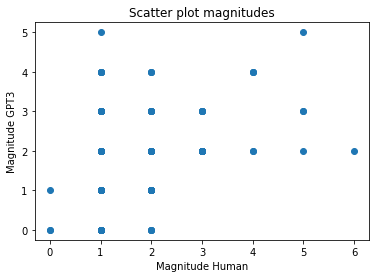

In [75]:
plt.scatter(df_final['magnitude'],df_final.magnitude_gpt3)
plt.title("Scatter plot magnitudes")
plt.ylabel("Magnitude GPT3")
plt.xlabel("Magnitude Human")
plt.show()

In [76]:
df_final.to_csv("../outputs/analysis/responses_gpt3_prices_tasks.csv",index=False)

In [77]:
df_final.shape

(251, 5)

In [120]:
df_final

,query,in USD,parsed_score,magnitude,magnitude_gpt3
0,fine for jaywalking,1.000000,50.00,0,1.0
1,cost of a cup of coffee,5.000000,2.75,0,0.0
2,cost of painting a mailbox,20.000000,50.00,1,1.0
3,cost of painting a front door,150.000000,100.00,2,2.0
4,cost of repairing a house window,200.000000,100.00,2,2.0
...,...,...,...,...,...
193,chatbots,94.966111,50.00,1,1.0
198,qa & review,26.668333,50.00,1,1.0
199,online tutoring,11.691944,15.00,1,1.0
209,personal stylists,22.696667,80.00,1,1.0


In [78]:
df_prices_mae.shape

(206, 5)

In [80]:
df_items.shape

(45, 5)

In [112]:
c=df_final.sample(n=12)

In [113]:
d=c.loc[:,['query','in USD','parsed_score']]

In [114]:
d['in USD']=round(d['in USD'])

In [115]:
d['query']=d['query'].str.capitalize()

In [116]:
d['in USD']=d['in USD'].apply(int)

In [117]:
d=d.sort_values('in USD')

In [118]:
d

,query,in USD,parsed_score
165,Video templates editing,17,50.0
136,Project management,26,58000.0
39,Fashion design,33,500.0
78,Creative writing,46,50.0
86,Product descriptions,49,50.0
71,Web analytics,63,500.0
147,Short video ads,74,500.0
24,Cost of one car tire,170,100.0
70,Marketing advicenew,345,100.0
159,Live action explainers,2148,1500.0


In [119]:
print(d.to_latex(index=False))

\begin{tabular}{lrr}
\toprule
                                       query &  in USD &  parsed\_score \\
\midrule
                     Video templates editing &      17 &          50.0 \\
                          Project management &      26 &       58000.0 \\
                              Fashion design &      33 &         500.0 \\
                            Creative writing &      46 &          50.0 \\
                        Product descriptions &      49 &          50.0 \\
                               Web analytics &      63 &         500.0 \\
                             Short video ads &      74 &         500.0 \\
                        Cost of one car tire &     170 &         100.0 \\
                         Marketing advicenew &     345 &         100.0 \\
                      Live action explainers &    2148 &        1500.0 \\
Cost of veterinarian bills for dog poisoning &    4000 &         800.0 \\
                 Cost of fixing a broken leg &    7500 &        2500.0 \